# Algorithms and mathematics of machine learning
## Laboratory 3

To complete the laboratory, use the libraries:
- [numpy](https://numpy.org/)
- [matplotlib](https://matplotlib.org/)

### Task 1 - shopping

The following products are available in the store:

| Product           | Price (net) | Tax  |
|-------------------|-------------|------|
| Bread             | 3           | 5%   |
| Water bottle (1l) | 2           | 8%   |
| Tomato 1 pc.      | 2           | 5%   |
| Oil (1l)          | 6           | 5%   |
| Saffron           | 1.5         | 8%   |
| Shrimp (package)  | 20          | 23%  |
| Ice (pack)        | 5           | 23%  |

#### Task 1A

- Store the product names in the `N` array.
- Store product prices in array `C`.
- Store the tax in the `P` array.

*(one-dimensional array, i.e. vector)*

In [1]:
from numpy import array


N = array(['Bread', 'Water bottle (1l)', 'Tomato 1 pc.', 'Oil (1l)', 'Saffron', 'Shrimp (package)', 'Ice (package)'])
C = array([3, 2, 2, 6, 1.5, 20, 5])
P = array([5, 8, 5, 5, 8, 23, 23])

#### Task 1B

Customer bought:

- 2 pieces of bread,
- 6 bottles of water,
- 1 pack of shrimp.

Save the customer's purchases in the `Z` vector (maintain dimensionality).

In [2]:
z = array([2, 6, 0, 0, 0, 1, 0])

#### Task 1C

Calculate the **net** amount that the customer must pay without using:
- operator `+`,
- `sum` function/method
- operating scalar multiplication (`*`, `__mul__`).

> Hint: one of the vectors needs to be transposed

In [3]:
from numpy import dot


def show_net_value(prices: array, product_quantity: array) -> None:
    print(f'The customer paid {dot(prices.T, product_quantity)} PLN net')

show_net_value(
    prices=C,
    product_quantity=z
)

The customer paid 38.0 PLN net


#### Task 1D

Calculate the **gross** value that the customer must pay in the store. You can use the `*` operator for this task.

Additionally, display the bill in the form of a table containing the following columns:
- product name,
- net price,
- the number of items,
- net price of a given item (net price x number of pieces),
- tax (as a percentage, e.g. `5%`),
- gross price of a given item.

The gross amount to be paid should be displayed at the end of the table.

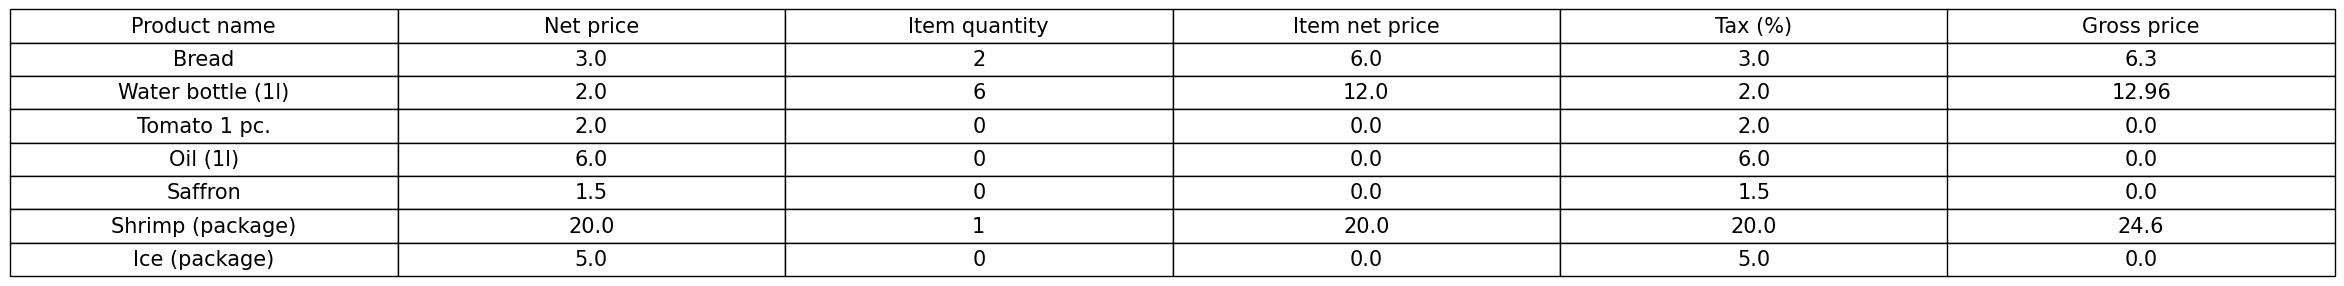

In [4]:
from matplotlib.pylab import subplots, table, show


def show_receipt(names: array, prices: array, product_quantity: array, taxes: array) -> None:
    labels = ['Product name', 'Net price', 'Item quantity', 'Item net price', 'Tax (%)', 'Gross price']

    rows = array([names, prices, product_quantity, prices * product_quantity, prices, prices * product_quantity + prices * product_quantity * (taxes / 100)]).T

    fig, ax = subplots(figsize=(15, 1))
    ax.set_axis_off()
    table_obj = table(
        cellText=rows,
        colLabels=labels,
        cellLoc='center',
        loc='center'
    )
    table_obj.set_fontsize(15)
    table_obj.scale(2, 2)

    show()

show_receipt(
    names=N,
    prices=C,
    product_quantity=z,
    taxes=P
)

### Task 2

Modify the code from the first task in such a way that product data will be loaded from the `dataset/products.csv` file and account data (number of products purchased) from the `dataset/bill.csv` file.

Create sample data (different from task 1).

The customer paid 432.0 PLN net


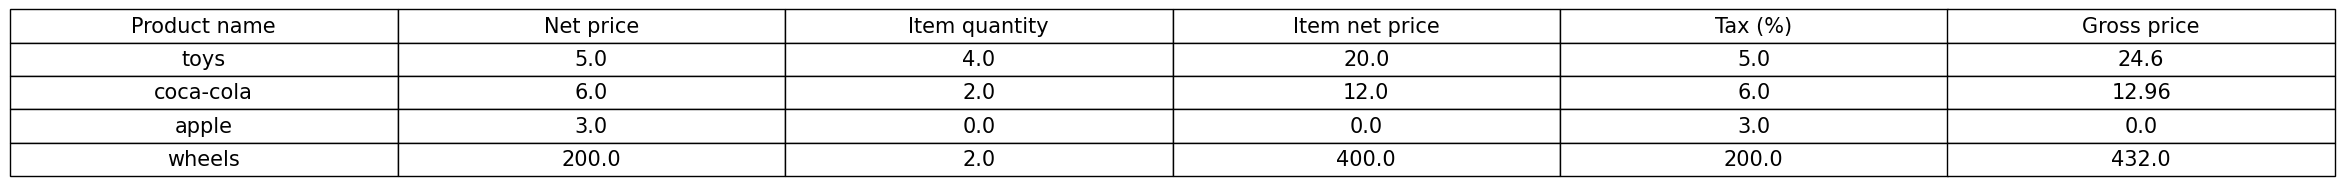

In [5]:
from numpy import genfromtxt


def extract_products_data(data: array) -> tuple:
    return data[:, 0], data[:, 1].astype(float), data[:, 2].astype(float)


product_quantity_path = './dataset/bill.csv'
products_path = './dataset/products.csv'

product_quantity = genfromtxt(product_quantity_path, delimiter=',')
products = genfromtxt(products_path, delimiter=',', dtype=str)

names, prices, taxes = extract_products_data(products)

show_net_value(
    prices=prices,
    product_quantity=product_quantity
)

show_receipt(
    names=names,
    prices=prices,
    product_quantity=product_quantity,
    taxes=taxes
)

### Task 3

#### Task 3A

Create two two-element vectors `A` and `B` (any positive non-zero values).

Then sum the elements of both vectors and save it in the variable `C`.

In [6]:
A = array([1, 2])
B = array([5, 4])
C = A + B
C

array([6, 6])

#### Task 3B

View on chart:
- _leading vector_ (arrow) from point `(0, 0)` to points `A` and `B` (in color <font color='green'>green</font>),
- _leading vector_ (arrow) from point `(0, 0)` to point `C` (in color <font color='red'>red</font>)
- leading vector from point `A` to point `C` (in color <font color='blue'>blue</font>),
- leading vector from point `B` to point `C` (in color <font color='blue'>blue</font>).

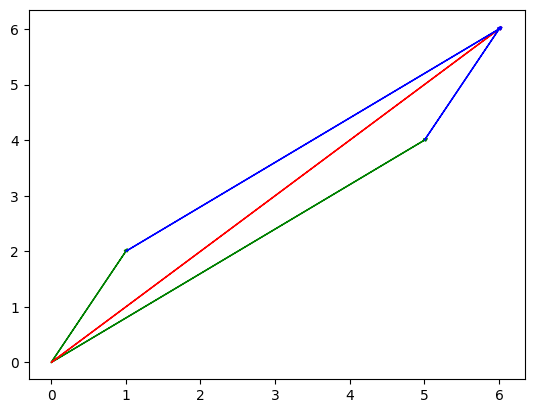

In [7]:
from matplotlib.pyplot import arrow

arrow(0, 0, A[0], A[1], head_width=0.05, head_length=0.05, color='g')
arrow(0, 0, B[0], B[1], head_width=0.05, head_length=0.05, color='g')
arrow(0, 0, C[0], C[1], head_width=0.05, head_length=0.05, color='r')
arrow(A[0], A[1], C[0] - A[0], C[1] - A[1], head_width=0.05, head_length=0.05, color='b')
arrow(B[0], B[1], C[0] - B[0], C[1] - B[1], head_width=0.05, head_length=0.05, color='b')

show()

### Task 4

Generate a random 8×8 matrix according to the Gaussian distribution (mean: 100, std. deviation = 15),
round values to integers (int). This matrix represents a certain image (grayscale).

Then apply a 3×3 averaging filter to the internal elements (i.e. outside the edge) of this matrix and print the result. In the averaging filter, round down to an integer.

> Hint: data generation: np.random.normal, np.round.

In [8]:
from numpy.random import normal


matrix = normal(100, 15, (8, 8)).astype(int)
matrix

array([[108, 104,  94,  76, 114,  95,  77, 117],
       [125, 115, 101,  91,  89, 102,  88, 101],
       [ 84, 127, 101, 117, 109, 124,  96, 121],
       [ 60,  98,  88,  79, 106,  90,  86,  96],
       [ 89, 102, 114, 100, 110, 118,  98, 106],
       [109, 111, 111, 101,  97, 105,  92, 110],
       [ 98, 143, 109,  96, 130,  87, 104, 108],
       [ 87,  87, 113, 122,  83, 123, 140, 125]])

In [9]:
from numpy import zeros, floor, average


filtered_matrix = zeros((6, 6), dtype=int)
for i in range(1, matrix.shape[0] - 1):
    for j in range(1, matrix.shape[1] - 1):
        filtered_matrix[i - 1, j - 1] = floor(average([
            matrix[i - 1, j - 1],   matrix[i - 1, j],   matrix[i - 1, j + 1],
            matrix[i,     j - 1],   matrix[i,     j],   matrix[i,     j + 1],
            matrix[i + 1, j - 1],   matrix[i + 1, j],   matrix[i + 1, j + 1]
        ]))

filtered_matrix

array([[106, 102,  99, 101,  99, 102],
       [ 99, 101,  97, 100,  98, 100],
       [ 95, 102, 102, 105, 104, 103],
       [ 98, 100, 100, 100, 100, 100],
       [109, 109, 107, 104, 104, 103],
       [107, 110, 106, 104, 106, 110]])